In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
def hyperbolic_v(t):
    return (1/3)*np.pi*(-2*t + np.sinh(2*t))

def hyperbolic_h(t,d):
    return (1/(4*np.pi*t)**(3/2)) * (d/np.sinh(d)) * np.exp(-t-(d**2)/(4*t))

def euclid_v(t):
    return (4/3) * np.pi * (t)**(3)
def euclid_h(t,d):
    return (1/(4*np.pi*t)**(3/2)) * np.exp(-(d**2)/(4*t))

In [2]:
t = 2
d = 4
def estimated_hyperbolic_d(t,d, alpha = 1, beta = 4):
    return np.sqrt(-beta*t*(np.log(hyperbolic_h(t,d)) + np.log(hyperbolic_v(np.sqrt(t))) - np.log(alpha)))

def estimated_euclid_d(t,d):
    return np.sqrt(-4*t*(np.log(euclid_h(t,d)) + np.log(euclid_v(np.sqrt(t))) +np.log(6*np.sqrt(np.pi)) ))

## Euclidean

/tmp/ipykernel_1125087/1059202559.py:7: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(-4*t*(np.log(euclid_h(t,d)) + np.log(euclid_v(np.sqrt(t))) +np.log(6*np.sqrt(np.pi)) ))


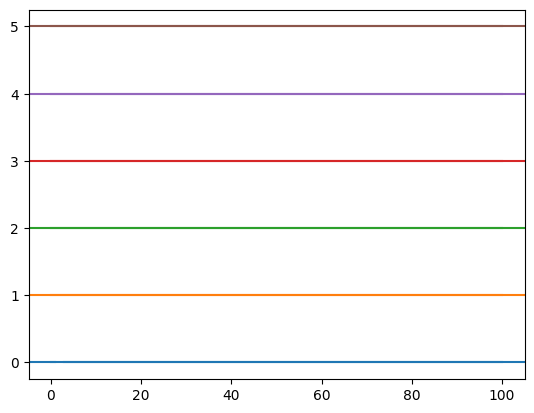

In [5]:
cmap = sns.color_palette("tab10")
ts = [0.1,1,2,3,4,5,10,100]
plt.figure()
for i_d, d in enumerate([0,1,2,3,4,5]):
    est_d = []
    for t in ts:
        est_d.append(estimated_euclid_d(t,d))
    plt.plot(ts,est_d, color = cmap[i_d])
    plt.axhline(d, color=cmap[i_d])

## Hyperbolic

/tmp/ipykernel_1125087/1369686136.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return (1/(4*np.pi*t)**(3/2)) * (d/np.sinh(d)) * np.exp(-t-(d**2)/(4*t))
/tmp/ipykernel_1125087/1059202559.py:4: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(-beta*t*(np.log(hyperbolic_h(t,d)) + np.log(hyperbolic_v(np.sqrt(t))) - np.log(alpha)))


Text(0.5, 0, 't')

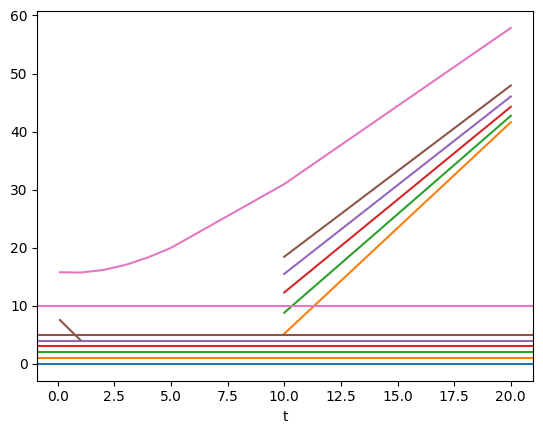

In [6]:
cmap = sns.color_palette("tab10")
ts = [0.1,1,2,3,4,5,10,20]
plt.figure()
for i_d, d in enumerate([0,1,2,3,4,5,10]):
    est_d = []
    for t in ts:
        est_d.append(estimated_hyperbolic_d(t,d,alpha = 0.00001, beta = 10))
    plt.plot(ts,est_d, color = cmap[i_d])
    plt.axhline(d, color=cmap[i_d])

plt.xlabel("t")

/tmp/ipykernel_1125087/4084574237.py:2: RuntimeWarning: divide by zero encountered in log
  return -t*(np.log(hyperbolic_h(t,d)) + np.log(hyperbolic_v(np.sqrt(t))) - alpha)


Text(0.5, 0, 't')

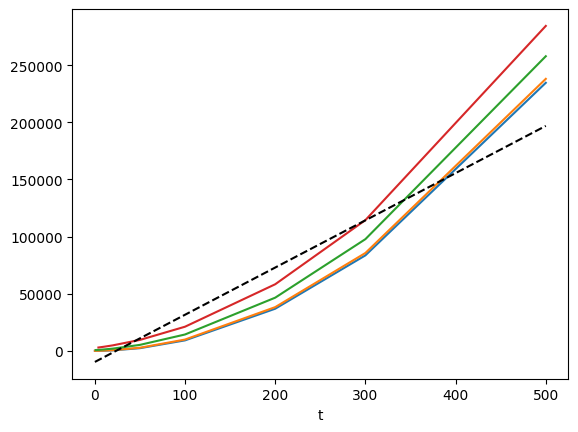

In [8]:
def sum_h_v(t,d,alpha = 1):
    return -t*(np.log(hyperbolic_h(t,d)) + np.log(hyperbolic_v(np.sqrt(t))) - alpha)

cmap = sns.color_palette("tab10")
ts = [0.1,1,2,3,4,5,10,20,50,100,200,300,500]
plt.figure()
for i_d, d in enumerate([1,10,50,100]):
    est_d = []
    for t in ts:
        est_d.append(sum_h_v(t,d, alpha = -0))
    plt.plot(ts,est_d, color = cmap[i_d])
    if i_d == 0:
        linear_approx = np.polyfit(ts,est_d,1)
    #plt.axhline(d, color=cmap[i_d])
plt.plot(ts, linear_approx[0]*np.array(ts) + linear_approx[1], color = "black", linestyle = "--")
plt.xlabel("t")

## Sphere

In [1]:
import scipy
def Asphere(n):
    """
    Compute the area of a sphere in n dimensions
    """
    return (2*np.pi**((n+1)/2))/(scipy.special.gamma((n+1)/2))

def Ssphere(n):
    """
    Compute the area of a sphere in n dimensions
    """
    return np.pi**((n+1)/2) / scipy.special.gamma((n+1)/2 + 1)

def expansion_term(l,n,rho,t):
    """
    l : the index of the expansion term
    n : the dimension of the sphere
    rho : the geodesic distance
    """
    return np.exp(-l*(l+n-2)*t) * ((2*l + n -2 )/(n-2)) * (1/Asphere(n-1)) * scipy.special.gegenbauer(l,n/2-1)(np.cos(rho))

def sphere_h(t,d,n =3, order=100):
    h = 0
    for ox in range(order):
        h += expansion_term(ox,n,d,t)
    return h

def sphere_v(t,n = 4):
    an = 2*np.pi**(n/2)/scipy.special.gamma(n/2)
    return 0.5* an * scipy.special.betainc((n-1)/2, 1/2, np.sin(t)**2)

def estimated_sphere_d(t,d, n = 3, alpha = 1, beta = 4):
    return np.sqrt(-beta*t*(np.log(sphere_h(t,d, n = n)) + np.log(sphere_v(np.sqrt(t),n=n+1)) - np.log(alpha)))

In [5]:
cmap = sns.color_palette("tab10")
ts = [0.1,1,2,3,4,5,10]
plt.figure()
for i_d, d in enumerate([0,1,2,3,4,5]):
    est_d = []
    for t in ts:
        est_d.append(estimated_sphere_d(t,d,alpha = 1, beta = 4))
    plt.plot(ts,est_d, color = cmap[i_d], label = f"d = {d}")
    plt.axhline(d, color=cmap[i_d])
plt.xlabel("t")
plt.ylabel("Estimated geodesic distance")
plt.legend()

TypeError: expansion_term() takes 3 positional arguments but 4 were given

<Figure size 640x480 with 0 Axes>

## Circle

In [14]:
import scipy

def expansion_term(m, rho, t):
    return 1/(np.sqrt(4*np.pi * t)) * np.exp(-((rho+2*np.pi*m)**2) /(4*t))

def circle_h(t,d,order=100):
    h = 0
    for ox in range(order):
        h += expansion_term(ox,d,t)
    return h

def circle_v(t):
    return t

def estimated_circle_d(t,d, alpha = 1, beta = 4):
    return -beta*t*(np.log(circle_h(t,d)) + np.log(circle_v(np.sqrt(t))) - np.log(alpha))

Text(0.5, 1.0, 'Varadhan approximation for the circle')

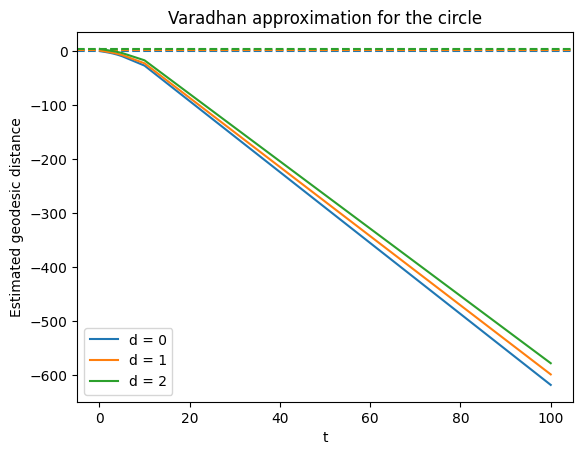

In [30]:
cmap = sns.color_palette("tab10")
ts = [0.1,1,2,3,4,5,10,100]
plt.figure()
for i_d, d in enumerate([0,1,2]):
    est_d = []
    for t in ts:
        est_d.append(estimated_circle_d(t,d,alpha = 0.2, beta = 4))
    plt.plot(ts,est_d, color = cmap[i_d], label = f"d = {d}")
    plt.axhline(d**2, color=cmap[i_d],linestyle = "--")
plt.xlabel("t")
plt.ylabel("Estimated geodesic distance")
plt.legend()
plt.title("Varadhan approximation for the circle")